In [2]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
from math import ceil
from exp_utils import JeongganSynthesizer, get_img_paths

In [70]:
class JeongganboPageDrawer:
  def __init__(self,
               page_width=8.27,
               page_height=11.69,
               page_left_margin=0.6,
               page_bottom_margin=0.5,
               dpi = 300):
    self.page_width = page_width
    self.page_height = page_height
    self.page_left_margin = page_left_margin
    self.page_bottom_margin = page_bottom_margin
    self.main_rect_width = 7
    self.main_rect_height = 10.7
    self.upper_margin_height = 1
    self.dpi = dpi
    note_img_path_dict = get_img_paths('test/synth/src', ['notes', 'symbols'])
    self.synth = JeongganSynthesizer(note_img_path_dict)
    self.maximum_gak_width = self.main_rect_width / 21
  

  def draw_blank_page(self,
                      num_cols = 10,
                      num_jeonggans_per_gak = 10,
                      jg_width_ratio = 1.2,
                      daegang_length = (3,2,2,3),
                      is_title_page = False):

    fig, ax = plt.subplots(figsize=(self.page_width, self.page_height), dpi=self.dpi)
    ax.set_xlim(0, self.page_width)
    ax.set_ylim(0, self.page_height)

    rectangle_x = self.page_left_margin
    rectangle_y = self.page_bottom_margin
    gak_width = min(self.main_rect_width / (num_cols * 2 + 1), self.maximum_gak_width)
    gak_height = (0.5 * self.main_rect_height) - self.upper_margin_height
    jg_width = gak_width * jg_width_ratio
    jg_height = gak_height / num_jeonggans_per_gak

    # Draw main border rectangle
    rectangle = plt.Rectangle((rectangle_x, rectangle_y),
                               self.main_rect_width,
                               self.main_rect_height,
                               edgecolor='black',
                               facecolor='none')
    ax.add_patch(rectangle)

    if is_title_page:
      title_border_x = rectangle_x + self.main_rect_width - (gak_width * 2)
      ax.plot([title_border_x, title_border_x],
              [rectangle_y, rectangle_y + self.main_rect_height],
              color='black',
              linewidth=1)
      margin_block_width = title_border_x - rectangle_x
    else:
      margin_block_width = self.main_rect_width

    # Draw margin blocks
    upper_margin_y = self.page_bottom_margin + self.main_rect_height - self.upper_margin_height
    upper_margin_block = plt.Rectangle((rectangle_x, upper_margin_y),
                                       margin_block_width,
                                       self.upper_margin_height,
                                       edgecolor='black',
                                       facecolor='none')
    mid_margin_block = plt.Rectangle((rectangle_x,
                                      rectangle_y + gak_height),
                                      margin_block_width,
                                      self.upper_margin_height,
                                      edgecolor='black',
                                      facecolor='none')
    ax.add_patch(upper_margin_block)
    ax.add_patch(mid_margin_block)

    r = range(1, num_cols) if is_title_page else range(num_cols)
    gak_x_positions = [rectangle_x + self.main_rect_width - gak_width * (2 * i + 2) for i in r]

    # Draw Gaks
    for gak_x in gak_x_positions:
      left_x = gak_x
      right_x = gak_x + jg_width

      ax.plot([left_x, left_x],
              [rectangle_y, rectangle_y + gak_height],
              color='black',
              linewidth=0.5)
      ax.plot([left_x, left_x],
              [rectangle_y + (0.5 * self.main_rect_height),
               rectangle_y + self.main_rect_height - self.upper_margin_height],
              color='black',
              linewidth=0.5)
      
      ax.plot([right_x, right_x],
              [rectangle_y, rectangle_y + gak_height],
              color='black',
              linewidth=0.5)
      ax.plot([right_x, right_x],
              [rectangle_y + (0.5 * self.main_rect_height),
               rectangle_y + self.main_rect_height - self.upper_margin_height],
              color='black',
              linewidth=0.5)

    # Draw Jeonggan cells
    daegang_boundaries = [-1]
    for i, length in enumerate(daegang_length[:-1]):
      daegang_boundaries.append(daegang_boundaries[-1] + length)
    print(daegang_boundaries)

    jg_y_upper = [rectangle_y + (0.5 * self.main_rect_height) + jg_height * i for i in range(num_jeonggans_per_gak)]
    jg_y_lower = [rectangle_y + jg_height * i for i in range(num_jeonggans_per_gak)]

    for i, jeonggan_y in enumerate(reversed(jg_y_upper)):
      for gak_x in gak_x_positions:
        ax.plot([gak_x, gak_x + gak_width*jg_width_ratio], [jeonggan_y, jeonggan_y], color='black', linewidth=0.5)
      if i in daegang_boundaries[1:]:
        if is_title_page:
          x2 = title_border_x
        else:
          x2 = rectangle_x + self.main_rect_width
        ax.plot([rectangle_x, x2], [jeonggan_y, jeonggan_y], color='black', linewidth=1)
    
    for i, jeonggan_y in enumerate(reversed(jg_y_lower)):
      for gak_x in gak_x_positions:
        ax.plot([gak_x, gak_x + gak_width*jg_width_ratio], [jeonggan_y, jeonggan_y], color='black', linewidth=0.5)
      if i in daegang_boundaries[1:]:
        if is_title_page:
          x2 = title_border_x
        else:
          x2 = rectangle_x + self.main_rect_width
        ax.plot([rectangle_x, x2], [jeonggan_y, jeonggan_y], color='black', linewidth=1)
    
    jg_positions_upper = [(gak_x, jeonggan_y) for gak_x in gak_x_positions for jeonggan_y in jg_y_upper]
    jg_positions_lower = [(gak_x, jeonggan_y) for gak_x in gak_x_positions for jeonggan_y in jg_y_lower]
    jg_positions_upper.sort(key=lambda x: (-x[0], -x[1]))
    jg_positions_lower.sort(key=lambda x: (-x[0], -x[1]))
    jg_positions = jg_positions_upper + jg_positions_lower

    return fig, ax, jg_positions, (jg_width, jg_height)
  
  def draw_jeonggan(self, jeonggan_labels, ax, jg_positions, w_h_in_inches):
    print(len(jeonggan_labels), len(jg_positions))
    assert len(jeonggan_labels) == len(jg_positions)
    w, h = w_h_in_inches
    for label, jg_position in zip(jeonggan_labels, jg_positions):
      if label == '-:5': continue
      jng_dict = self.synth.label2dict(label)
      img = self.synth.get_blank(width=int(w*self.dpi), height=int(h*self.dpi))
      jng_img = self.synth.generate_image_by_dict(img, jng_dict, apply_noise=False, random_symbols=False)
      ax.imshow(jng_img, extent=(jg_position[0], jg_position[0] + w, jg_position[1], jg_position[1] + h))

[-1, 2, 4, 6]


(<Figure size 2481x3507 with 1 Axes>,
 <Axes: >,
 [(6.266666666666667, 9.764999999999999),
  (6.266666666666667, 9.329999999999998),
  (6.266666666666667, 8.895),
  (6.266666666666667, 8.459999999999999),
  (6.266666666666667, 8.024999999999999),
  (6.266666666666667, 7.59),
  (6.266666666666667, 7.154999999999999),
  (6.266666666666667, 6.72),
  (6.266666666666667, 6.284999999999999),
  (6.266666666666667, 5.85),
  (5.6, 9.764999999999999),
  (5.6, 9.329999999999998),
  (5.6, 8.895),
  (5.6, 8.459999999999999),
  (5.6, 8.024999999999999),
  (5.6, 7.59),
  (5.6, 7.154999999999999),
  (5.6, 6.72),
  (5.6, 6.284999999999999),
  (5.6, 5.85),
  (4.933333333333334, 9.764999999999999),
  (4.933333333333334, 9.329999999999998),
  (4.933333333333334, 8.895),
  (4.933333333333334, 8.459999999999999),
  (4.933333333333334, 8.024999999999999),
  (4.933333333333334, 7.59),
  (4.933333333333334, 7.154999999999999),
  (4.933333333333334, 6.72),
  (4.933333333333334, 6.284999999999999),
  (4.93333333

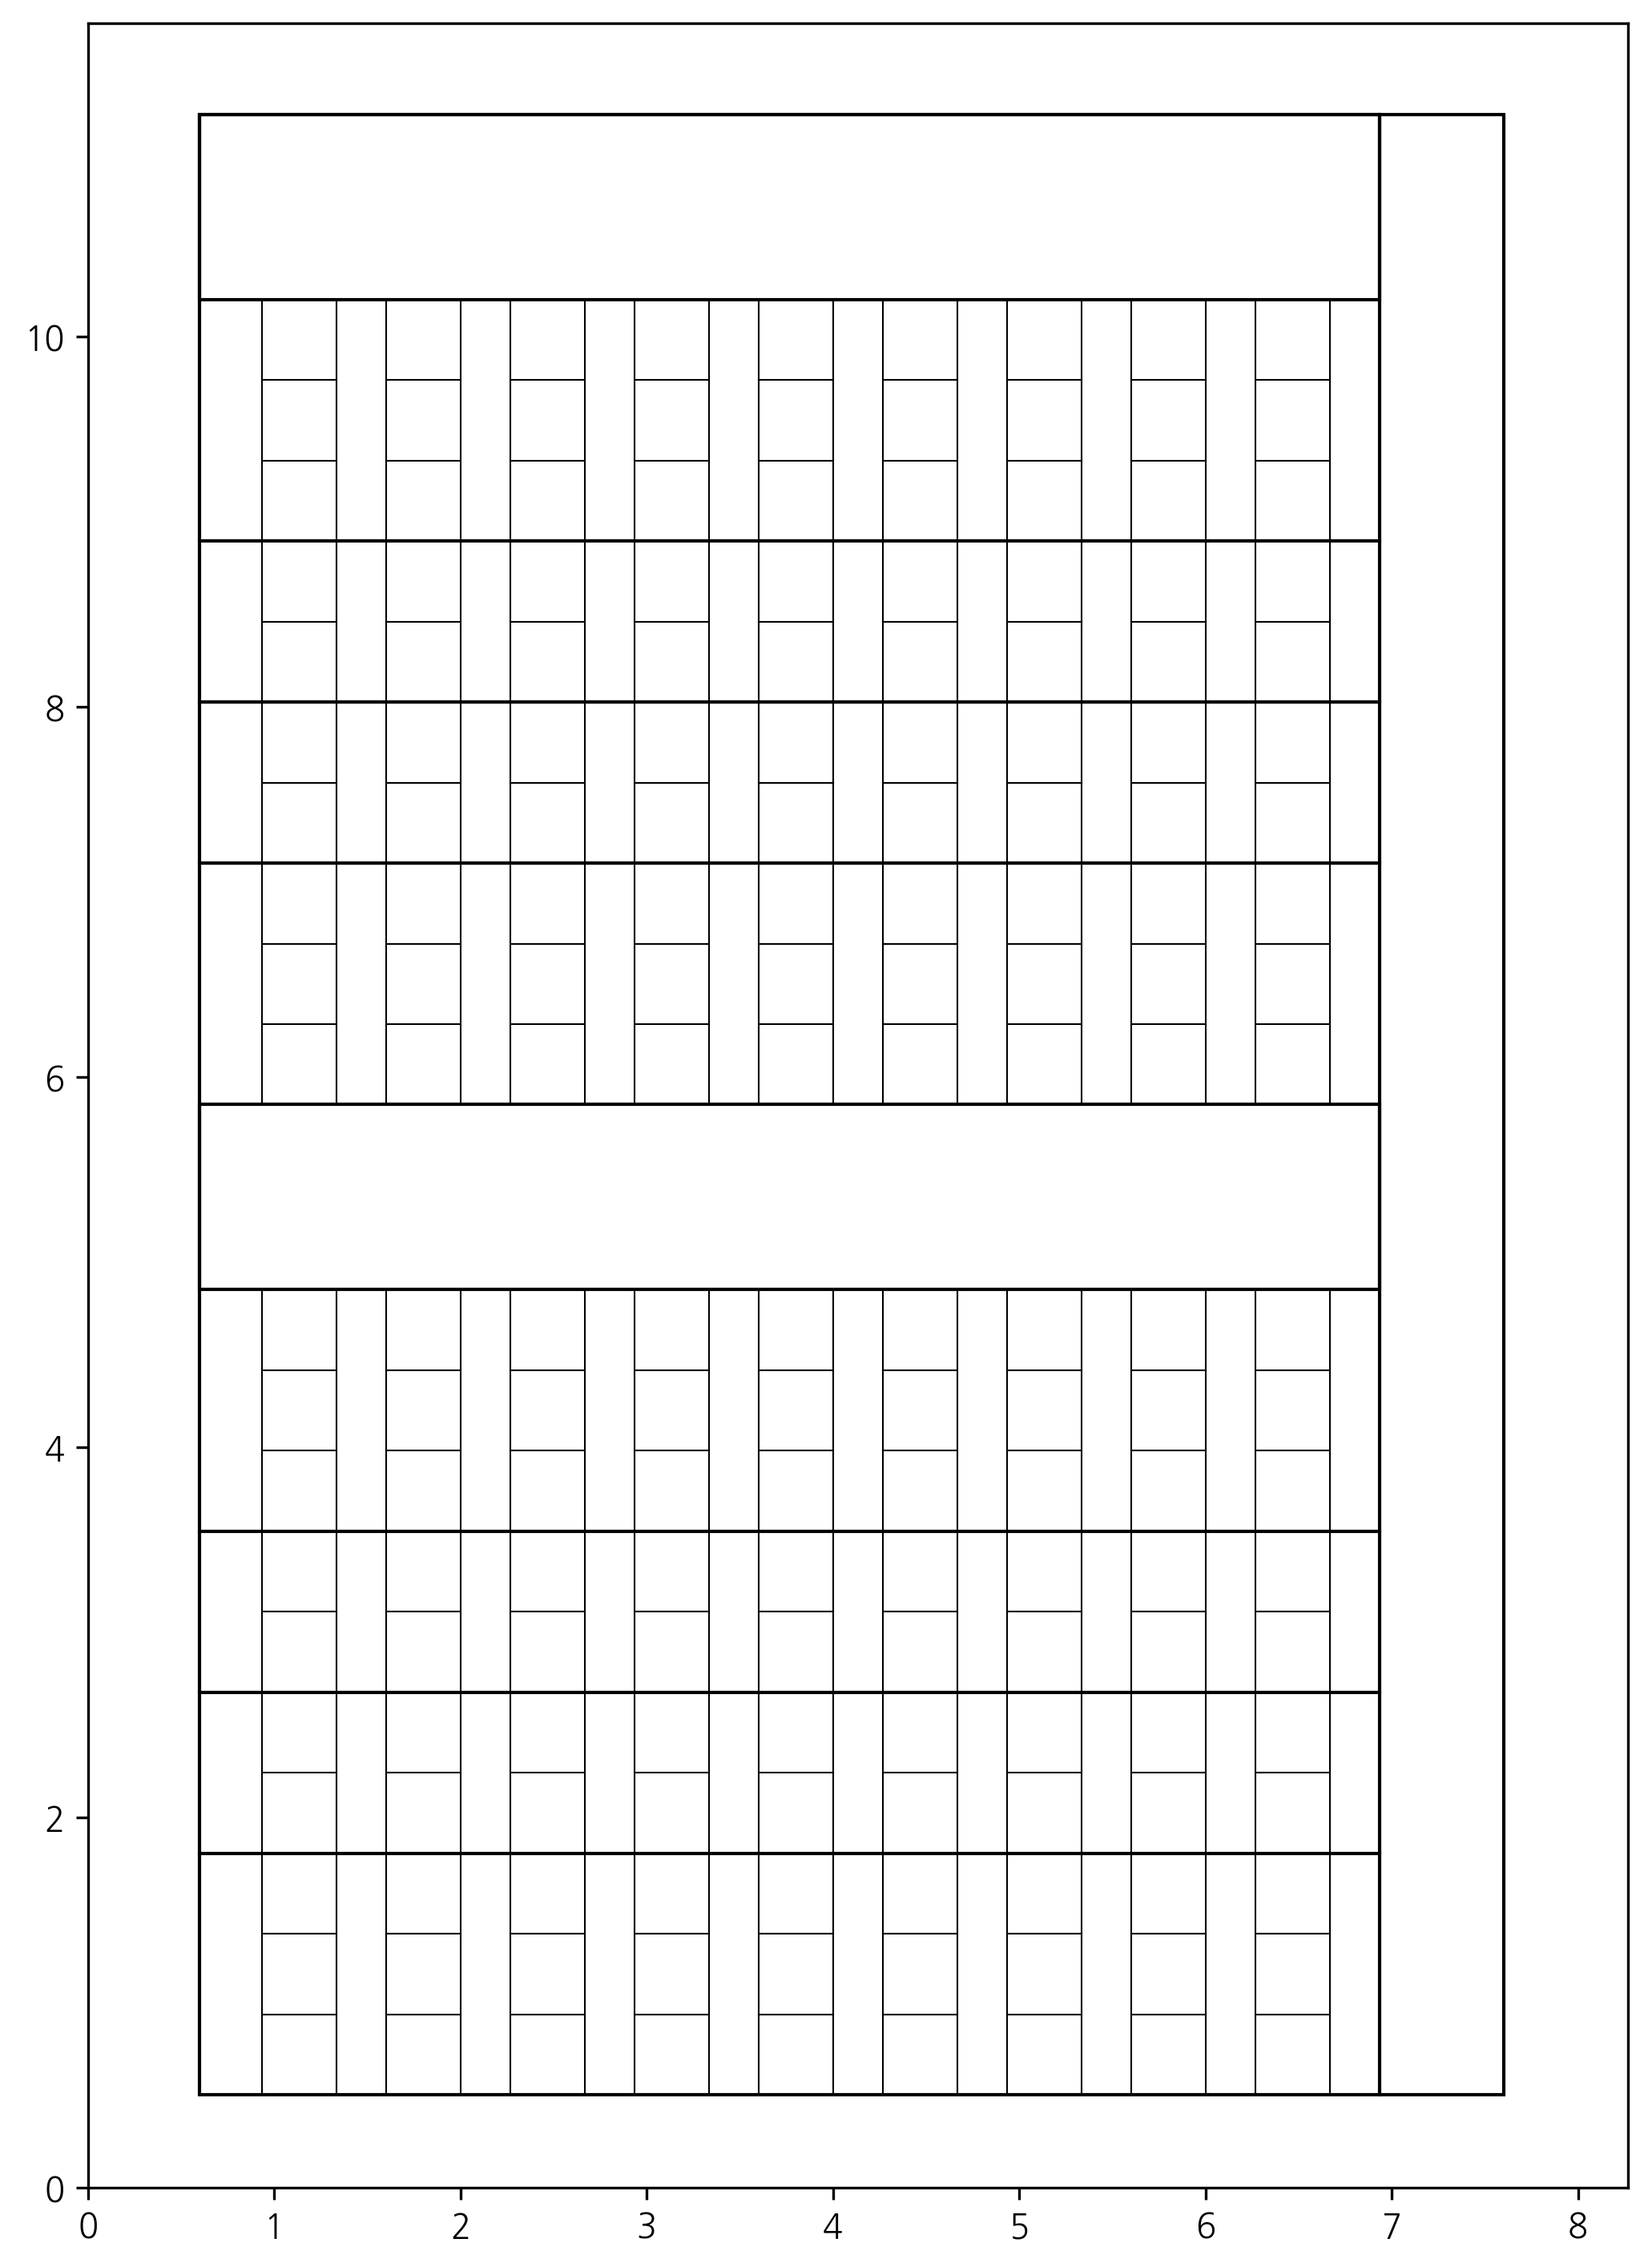

In [71]:
drawer = JeongganboPageDrawer()
drawer.draw_blank_page(is_title_page=True)

In [ ]:
import argparse
from PIL import Image
from pathlib import Path

parser = argparse.ArgumentParser()
parser.add_argument('--input_path', type=str, required=True)
parser.add_argument('--output_path', type=str, default='test/jg_page/')
parser.add_argument('--num_jeonggans_per_gak', type=int, default=20)
parser.add_argument('--daegang_length', type=int, nargs='+', default=[6,4,4,6])

args = parser.parse_args()
print(args.daegang_length)
Path(args.output_path).mkdir(parents=True, exist_ok=True)

with open(args.input_path, 'r') as f:
  jg_text = f.read()

jg_by_part = jg_text.split('\n\n')
jg_by_part = [jg.split('\n') for jg in jg_by_part]
for i, part in enumerate(jg_by_part):
  jg_by_part[i] = [gak for gak in part if len(gak.split('|')) > 1]

drawer = JeongganboPageDrawer()
# part_names = ['대금', '피리', '해금', '가야금', '거문고']
# part_names = ['대금', '해금', '피리', '가야금', '거문고']
part_names = ['대금', '피리', '해금', '아쟁', '가야금', '거문고']
image_paths = []

for i, part in enumerate(jg_by_part):
  for j in range(ceil(len(part)/10)):
    selected_gaks = part[j*10:(j+1)*10]
    num_cols = len(selected_gaks)
    jgs = [jg for gak in selected_gaks for jg in gak.split('|')]
    fig, ax, jg_positions, w_h = drawer.draw_blank_page(num_cols=num_cols, 
                                                        num_jeonggans_per_gak=args.num_jeonggans_per_gak,
                                                        daegang_length=args.daegang_length)
    drawer.draw_jeonggan(jgs, ax, jg_positions, w_h)
    ax.axis('off')
    plt.text(0.5, 0.02, f"{part_names[i]} - {str(j+1)}", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=12)
    plt.savefig(f'{args.output_path}{part_names[i]}_{j}.png', bbox_inches='tight', pad_inches=0, dpi=300)
    plt.close()
    print(f'{part_names[i]}_{j} is saved')
    image_paths.append(f'{args.output_path}{part_names[i]}_{j}.png')
    
    break
  break
    
first_image = Image.open(image_paths[0]).convert('RGB')
other_images = [Image.open(image).convert('RGB') for image in image_paths[1:]]

pdf_path = args.output_path + 'jeongganbo.pdf'
first_image.save(pdf_path, save_all=True, append_images=other_images)

In [74]:
a = [1, 2, 3 ,4, 5, 6]
b = ['a', 'b', 'c']
list(zip(a, b, strict=True))

ValueError: zip() argument 2 is shorter than argument 1